In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "AppleVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 8158 files belonging to 5 classes.


In [4]:
class_names = dataset.class_names
class_names

['Apple Scab', 'Black Rot', 'Cedar Apple Rust', 'Healthy', 'Unknown']

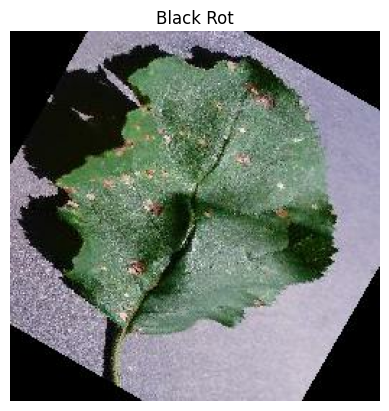

In [5]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

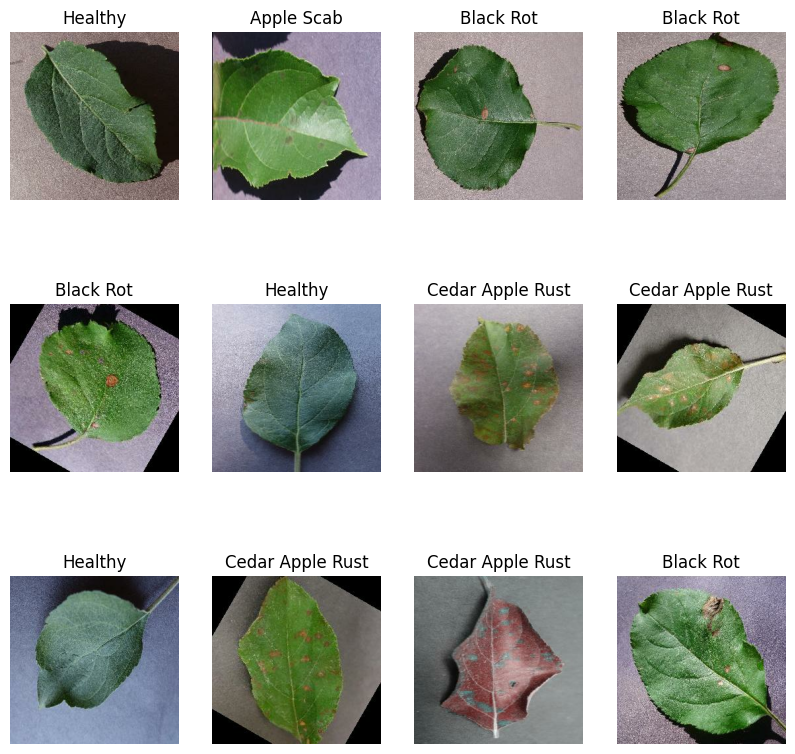

In [6]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
def get_dataset_partitions_tf(dataset, training_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(dataset)
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed = 12)
    training_size = int(training_split * ds_size)
    val_size = int(val_split * ds_size)
    training_ds = dataset.take(training_size)
    val_ds = dataset.skip(training_size).take(val_size)
    test_ds = dataset.skip(training_size).skip(val_size)
    return training_ds, val_ds, test_ds

training_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
len(training_ds)

204

In [9]:
len(val_ds)

25

In [10]:
len(test_ds)

26

In [12]:
training_ds = training_ds.map(augment).cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    ])
model.build(input_shape = input_shape)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 5)                     │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,021 (1.06 MB)

 Trainable params: 278,021 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [17]:
history = model.fit(
    training_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1049s 4s/step - accuracy: 0.4538 - loss: 1.2001 - val_accuracy: 0.8125 - val_loss: 0.5105
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 543s 3s/step - accuracy: 0.8610 - loss: 0.3730 - val_accuracy: 0.9150 - val_loss: 0.2569
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 519s 3s/step - accuracy: 0.9093 - loss: 0.2447 - val_accuracy: 0.8900 - val_loss: 0.3976
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 519s 3s/step - accuracy: 0.9395 - loss: 0.1724 - val_accuracy: 0.9425 - val_loss: 0.1610
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 517s 3s/step - accuracy: 0.9597 - loss: 0.1192 - val_accuracy: 0.9350 - val_loss: 0.1729
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 3474s 17s/step - accuracy: 0.9731 - loss: 0.0753 - val_accuracy: 0.8700 - val_loss: 0.4358
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - accuracy: 0.9552 - loss: 0.1302 - val_accuracy: 0.9525 - val_loss: 0.1567
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 565s 2s/step - accuracy: 0.9778 - loss: 0.0595 - val_a

In [18]:
scores = model.evaluate(test_ds)

26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 795ms/step - accuracy: 0.9725 - loss: 0.1114


In [19]:
scores

[0.09937085211277008, 0.9759615659713745]

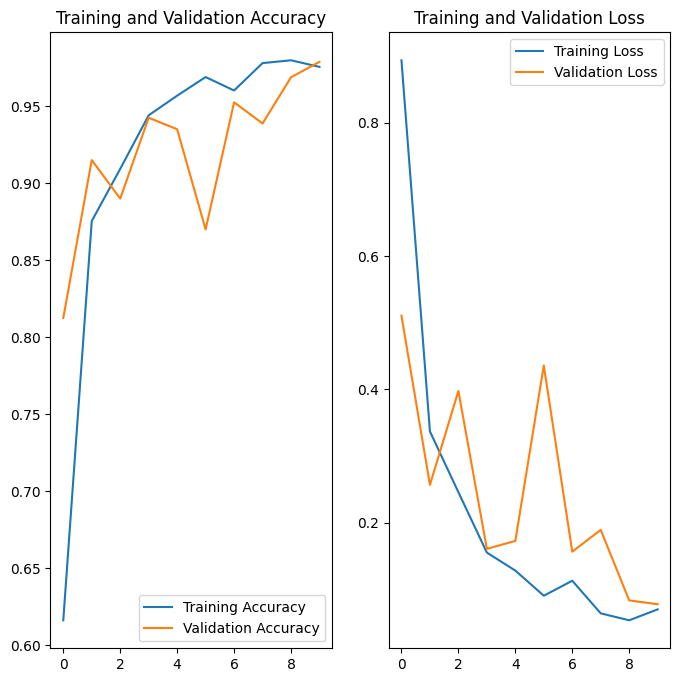

In [20]:
# Plotting a matplotlib chart
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual_label: Black Rot


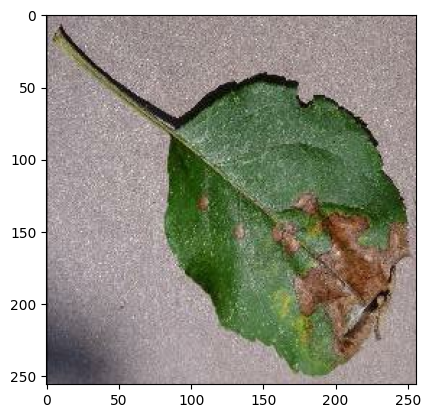

In [21]:
# Getting the actual label of our image
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual_label:", class_names[first_label])

In [22]:
batch_prediction = model.predict(image_batch)
# converting it to a class name
print("predicted_leabel:", class_names[np.argmax(batch_prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted_leabel: Healthy


In [23]:
# function that takes the model and image and highlights what is the predicted class and confidence
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


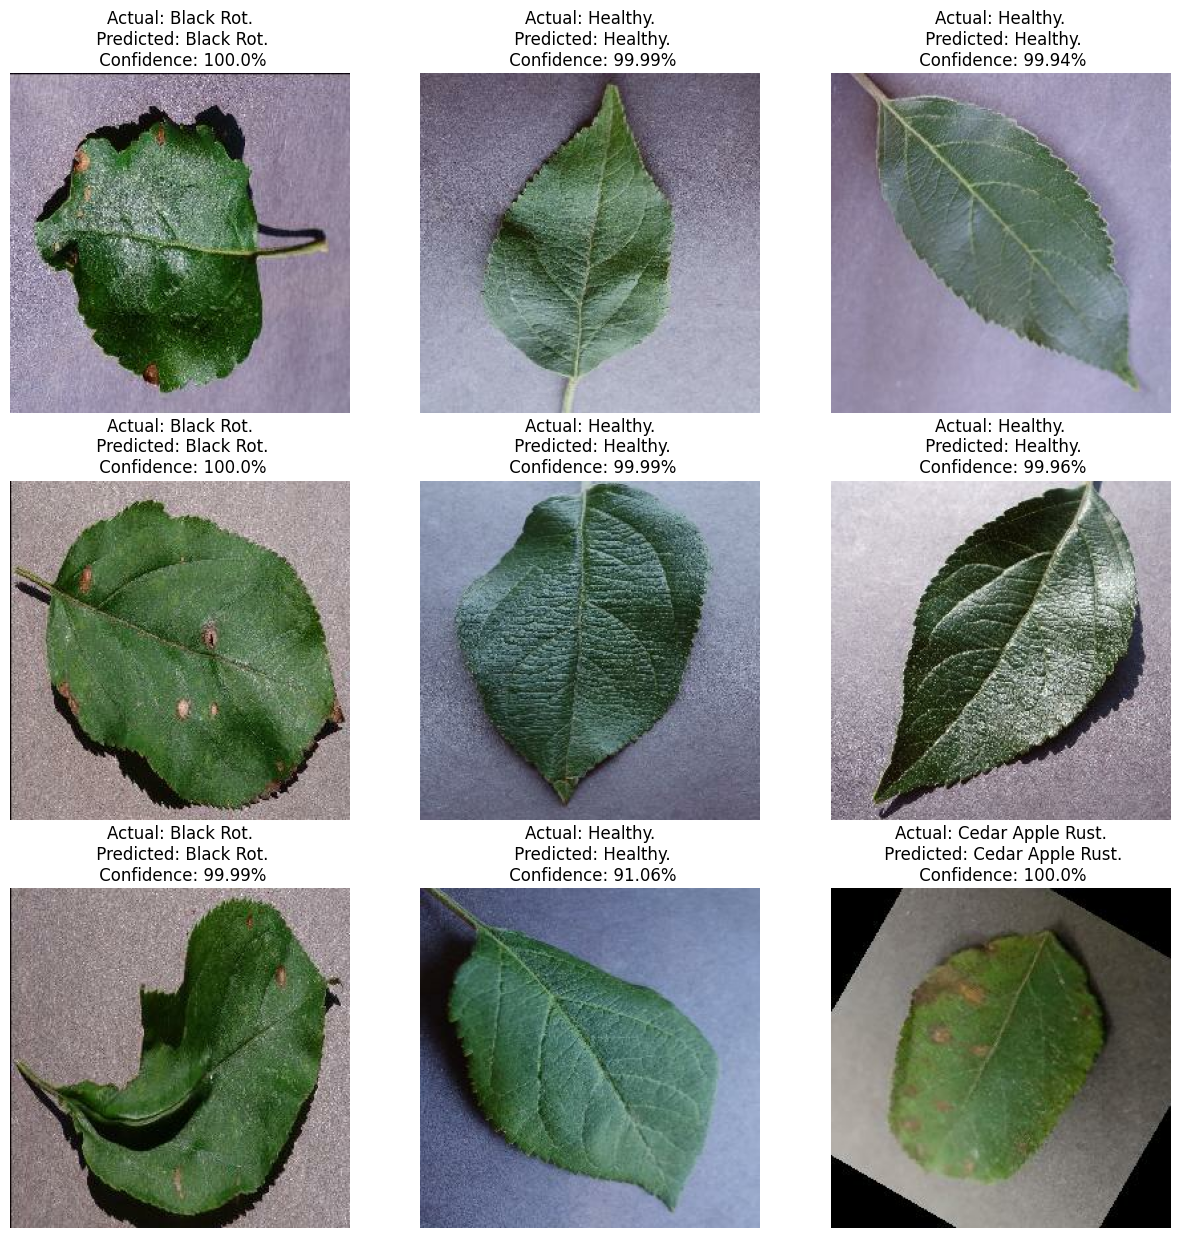

In [24]:
# Taking images from the test_ds and using the predict model to predict images and highlight the confidence
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
   for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i].numpy()]
        plt.title(f"Actual: {actual_class}.\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [27]:
import os

model_version = max([int(i.split('.')[0]) for i in os.listdir("../potato") if i.split('.')[0].isdigit()] + [0]) + 1
model.export(f"../potato/{model_version}")

INFO:tensorflow:Assets written to: C:\Users\user\Desktop\training (plant_chief)\apple\1\assets


INFO:tensorflow:Assets written to: C:\Users\user\Desktop\training (plant_chief)\apple\1\assets


Saved artifact at 'C:\Users\user\Desktop\training (plant_chief)\apple\1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_3')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2292235676560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2292235677616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2292235676736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2292235677968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2292235678320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2292235679376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2292235678496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2292235679728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2292235679200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2292235680080: TensorSpec(shape=(), dtype=tf.resource, name=None